# Tarea 4


In [1]:
Pkg.add("Roots")

INFO: Nothing to be done
INFO: METADATA is out-of-date — you may not have the latest version of Roots
INFO: Use `Pkg.update()` to get the latest versions of your packages


In [2]:
Pkg.update()

INFO: Updating METADATA...
INFO: Updating cache of DataFrames...
INFO: Updating cache of DataFrames...
INFO: Computing changes...
INFO: No packages to install, update or remove


In [3]:
using PyPlot, Roots
include("AutomDiff_V2.jl")
import AD: Dual, xdual

In [4]:
include("AutomDiff_V2.jl")

AD

In [5]:
import AD: Dual, xdual


## Ejercicio 0: Velocidad de convergencia. \\


El objetivo de este ejercicio es relacionar, la velocidad de convergencia con que un punto fijo (o una órbita periódica, en el caso de los dos últimos incisos) atraen a puntos suficientemente cercanos, con la derivada del mapeo en el punto fijo (o ciclo periódico). La idea es, entonces, calcular primero el punto fijo y, después, medir cómo la distancia de los iterados sucesivos (de una condición inicial $x_0$) al punto fijo se comporta en el tiempo, para los siguientes mapeos:
$F(x) = x^2+0.25$ \\
$F(x) = 3x(1-x)$ \\
$F(x) = \exp(x-1)$ \\
$F(x) = x^2 - 1.25$ \\
$F(x) = \exp(x+1)$ \\

Deberán resolver algunas cosas intermedias. Por ejemplo, ¿qué tanto deben acercarse al punto fijo, a fin de evitar ruido numérico? ¿Qué hay que hacer en el caso en que el punto sea neutral (ni atractivo ni repulsivo)?
En los dos últimos incisos, el interés es en los ciclos de periodo 2.


En este problema las funciones a utilizar son:

In [6]:
f1(x) = x^2 + 0.25
f2(x) = 3x*(1 - x)
f3(x) = exp(x - 1)
f4(x) = x^2 - 1.25
f42(x)= (x^2-1.25)^2-1.25
f5(x) = exp(1-x)
f52(x)= exp(1-(exp(1-x)))
f1prim(x)=2x
f2prim(x)=3-6x
f3prim(x)=exp(x-1)
f4prim(x)=2x
f5prim(x)=-exp(1-x)

f5prim (generic function with 1 method)

Para buscar los puntos fijos, usemos una función que calcule los ceros de las funciones fi-x.

In [7]:
function quadratic{T<:Real}(a::T, b::T, c::T)
    disc = b^2 - 4*a*c #Calculamos el valor del discriminante
    @assert a != 0 "Tu ecuación no es de segundo grado, revisa los argumentos.", disc < 0 
    "La ecuación tiene soluciones complejas, no es posible resolver la ecuación."
    resuelve_cuad(a,b,c, disc)
end

function resuelve_cuad(a, b, c, disc) #El algoritmo para encontrar las raíces
    sq = sqrt(disc)
    x1 = (-b+sq)/(2a)
    x2 = (-b-sq)/(2a)
    if x1 == x2
        raices = Float64[x1]
    else
        raices = typeof(x1)[x1,x2]
    end
    return raices
end

resuelve_cuad (generic function with 1 method)

Ahora hagamos una función que encuentre las distancias entre los iterados y los puntos fijos. Notemos que debemos variar
la condición inicial según el punto fijo encontrado previamente, pues algunos son atractores y otros repulsores.

In [8]:
function distancia{r<:Real, rs<:Real}(F::Function, x0::r, pfijos::Array{rs,1}, n)
    long = length(pfijos)
    dist= zeros(Float64, n, long)
    for j in 1:long
        pf = pfijos[j]
        it = copy(x0)
        for i in 1:n
            it = F(it)
           dist[i, j] = abs(it - pf)
        end
    end
    return dist
end

distancia (generic function with 1 method)

Con las funciones creadas, resolvamos el ejercicio.

## Para $f_1$

In [9]:
pf1= quadratic(1.0,-1.0,0.25)

1-element Array{Float64,1}:
 0.5

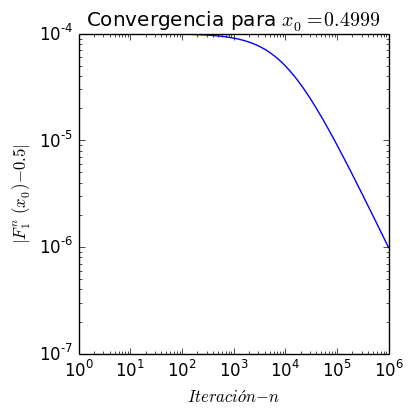

In [10]:
figure(figsize = (4, 4))
gpf1 = distancia(f1, 0.4999, pf1, 1000000);
d1 = reshape(gpf1, 1000000)
loglog(d1)
title(L"Convergencia para $x_0 = 0.4999$")
xlabel(L"Iteración-n")
ylabel(L"|F_1^n(x_0) - 0.5|")
show()

Calculemos la velocidad de convergencia al realizar una regresión lineal de la grafica loglog de nuestros datos , con 
los valores de las distancias en función del número de iteración.

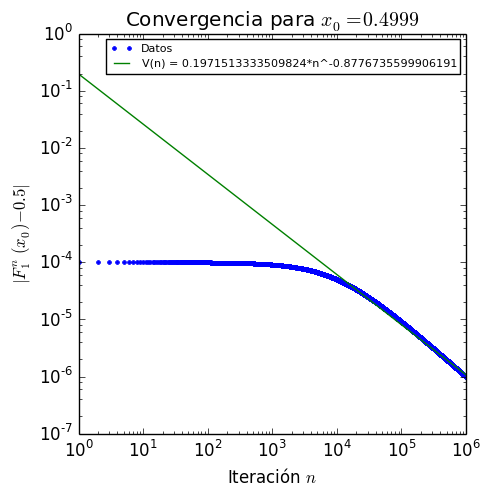

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/legend.py:317: UserWarning: Unrecognized location "auto". Falling back on "best"; valid locations are
	right
	center left
	upper right
	lower right
	best
	center
	lower left
	center right
	upper left
	upper center
	lower center

  % (loc, '\n\t'.join(self.codes.iterkeys())))


In [11]:
figure(figsize = (5,5))
dom1 = collect(1:1000000)
a1, b1 = linreg(log(dom1), log(d1))
ran1 = Float64[exp(a1)*x^b1 for x in dom1]
loglog(d1, ".", label = "Datos")
loglog(dom1, ran1, label = "V(n) = $(exp(a1))*n^$b1")
legend(fontsize = 8, loc = "auto")
title(L"Convergencia para $x_0 = 0.4999$")
xlabel(L"Iteración $n$")
ylabel(L"|F_1^n(x_0) - 0.5|")
show()

Según la aproximación obtenida, después de $10^3$ iteraciones, la velocidad de convergencia es : $V(n) \approx \frac{0.198}{n}$


Observamos que para un punto inicial cercano al punto fijo, la velocidad de convergencia es muy baja, pues necesitamos 
más de $10^3$ iteraciones para evitar el ruido numérico y notar que la distancia disminuye.
Probemos qué pasa con una condición inicial mayor que el punto fijo para determinar su naturaleza.

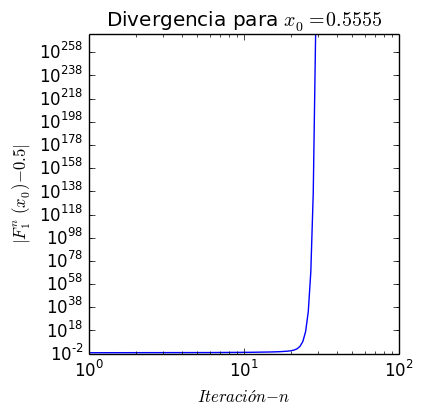

In [12]:
figure(figsize = (4, 4))
gpf1 = distancia(f1, 0.5555, pf1, 1000000);
d1 = reshape(gpf1, 1000000)
loglog(d1)
title(L"Divergencia para $x_0 = 0.5555$")
xlabel(L"Iteración-n")
ylabel(L"|F_1^n(x_0) - 0.5|")
show()

Aquí notamos que se necesitan menos de 10 iteraciones para que la distancia aumente por dos órdenes de magnitud.
Por lo que concluimos que es un punto fijo repulsor,pues su convergencia es muy lenta.

Para finalizar el análisis, obtengamos la derivada de la función en el punto fijo:

In [13]:
deripf1 = xdual(0.5)
f1(deripf1)

AD.Dual{Float64}(0.5,1.0)

## Para $f_2$

In [14]:
pf2=quadratic(-3.0,2.0,0.0)

2-element Array{Float64,1}:
 -0.0     
  0.666667

Utilizando el mismo método que en la función anterior, probemos con condiciones iniciales menores y mayores que el punto
fijo.

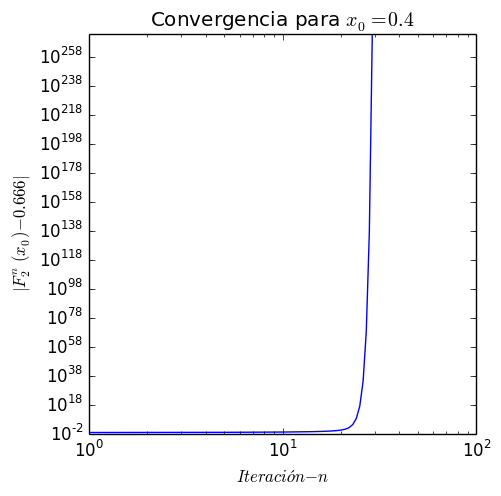

In [15]:
figure(figsize = (5, 5))
gr2 = distancia(f2,0.4, pf2, 1000000)
d2 = reshape(gr2[:,2],1000000)
loglog(d1)
title(L"Convergencia para $x_0 =0.4$")
xlabel(L"Iteración-n")
ylabel(L"|F_2^n(x_0) - 0.666|")
show()


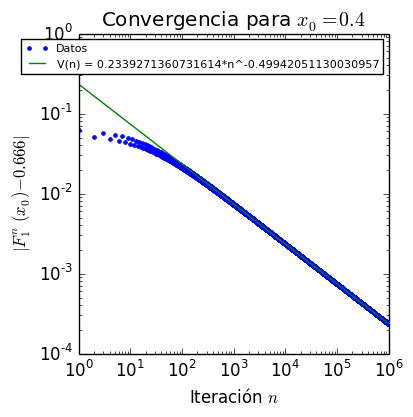

In [16]:
figure(figsize = (4,4))
dom1 = collect(1:1000000)
a1, b1 = linreg(log(dom1), log(d2))
ran1 = Float64[exp(a1)*x^b1 for x in dom1]
loglog(d2, ".", label = "Datos")
loglog(dom1, ran1, label = "V(n) = $(exp(a1))*n^$b1")
legend(fontsize = 8, loc = "auto")
title(L"Convergencia para $x_0 = 0.4$")
xlabel(L"Iteración $n$")
ylabel(L"|F_1^n(x_0) - 0.666|")
show()

En este caso la velocidad de convergencia está dada por: $ V(n)  \approx \frac{0.2339}{\sqrt{n}} $

Probemos ahora para una condición inicial mayor que el punto fijo

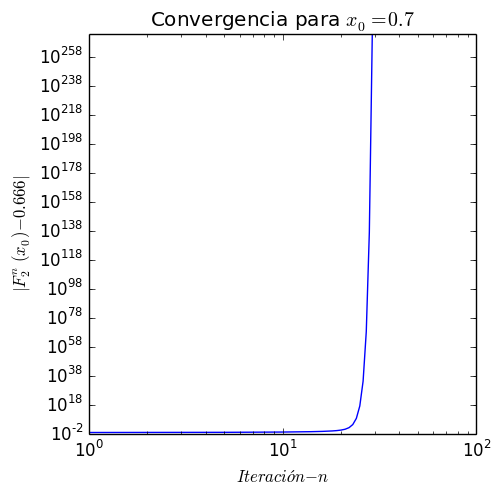

In [17]:
figure(figsize = (5, 5))
gr2 = distancia(f2,0.7, pf2, 1000000)
d2 = reshape(gr2[:,2],1000000)
loglog(d1)
title(L"Convergencia para $x_0 =0.7$")
xlabel(L"Iteración-n")
ylabel(L"|F_2^n(x_0) - 0.666|")
show()

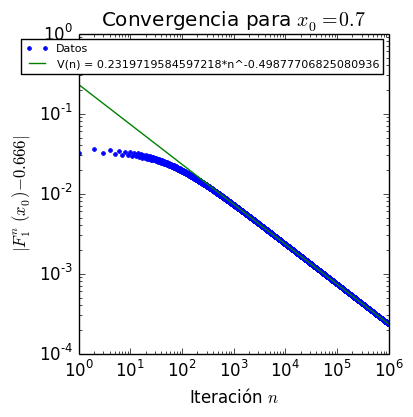

In [18]:
figure(figsize = (4,4))
dom1 = collect(1:1000000)
a1, b1 = linreg(log(dom1), log(d2))
ran1 = Float64[exp(a1)*x^b1 for x in dom1]
loglog(d2, ".", label = "Datos")
loglog(dom1, ran1, label = "V(n) = $(exp(a1))*n^$b1")
legend(fontsize = 8, loc = "auto")
title(L"Convergencia para $x_0 = 0.7$")
xlabel(L"Iteración $n$")
ylabel(L"|F_1^n(x_0) - 0.666|")
show()

En este caso la velocidad de convergencia está dada por: $ V(n)  \approx \frac{0.2319}{\sqrt{n}} $

Por lo que concluimos que se trata de un punto fijo atractor, y la derivada de la función en ese punto es: 

Ahora hagamos el mismo análisis para el punto fijo 0

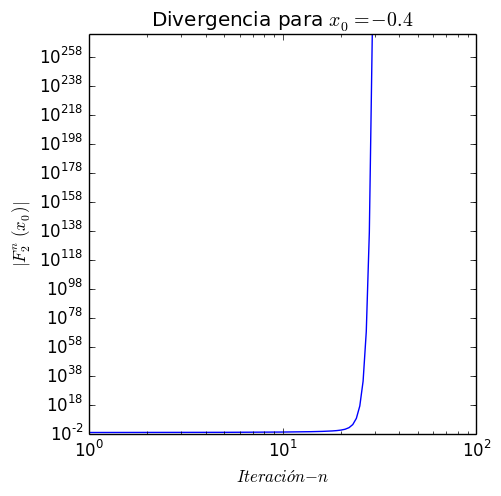

In [19]:
figure(figsize = (5, 5))
gr2 = distancia(f2,-0.4, pf2, 1000000)
d2 = reshape(gr2[:,1],1000000)
loglog(d1)
title(L"Divergencia para $x_0 =-0.4$")
xlabel(L"Iteración-n")
ylabel(L"|F_2^n(x_0)|")
show()

Ahora para un valor a la derecha del punto fijo.

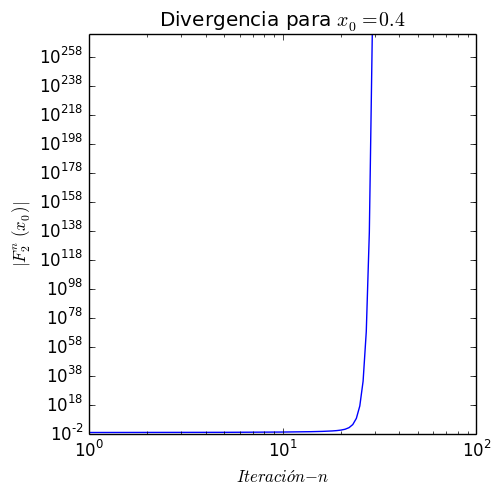

In [20]:
figure(figsize = (5, 5))
gr2 = distancia(f2,0.4, pf2, 1000000)
d2 = reshape(gr2[:,1],1000000)
loglog(d1)
title(L"Divergencia para $x_0 =0.4$")
xlabel(L"Iteración-n")
ylabel(L"|F_2^n(x_0)|")
show()

En ambos casos observamos que es un punto fijo repulsor. Obtengamos la derivada en ambos puntos fijos.

In [21]:
deripf2 = Float64[]

for j in pf2
    x0 = xdual(j)
    push!(deripf2, f2(x0).der)
end
pf2, deripf2

([-0.0,0.6666666666666666],[3.0,-1.0])

Tenemos que para el punto fijo repulsor la derivada es $>1$ mientras que para el atractor es $<1$

## Para $ f_3$

Los puntos fijos de la función son los que cumplen la ecuación: 

$e^{x-1}-x=0$

Obteniendo el logaritmo de ambos lados:

$x-ln(x)=1$

Que sólo se cumple para $ x=1$

Hagamos el análisis ya habitual:

In [22]:
pf3=[1.0]

1-element Array{Float64,1}:
 1.0

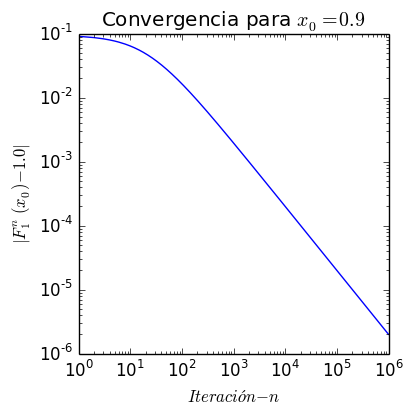

In [23]:
figure(figsize = (4, 4))
gpf3 = distancia(f3, 0.9, pf3, 1000000);
d3 = reshape(gpf3, 1000000)
loglog(d3)
title(L"Convergencia para $x_0 = 0.9$")
xlabel(L"Iteración-n")
ylabel(L"|F_1^n(x_0) - 1.0|")
show()

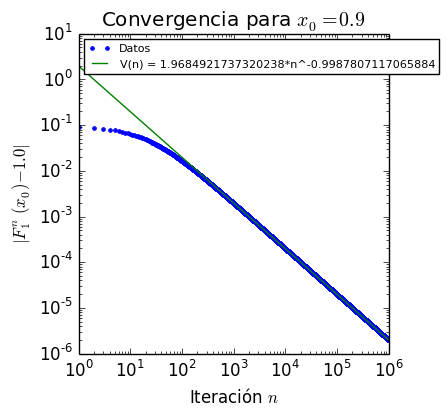

In [24]:
figure(figsize = (4,4))
dom1 = collect(1:1000000)
a1, b1 = linreg(log(dom1), log(d3))
ran1 = Float64[exp(a1)*x^b1 for x in dom1]
loglog(d3, ".", label = "Datos")
loglog(dom1, ran1, label = "V(n) = $(exp(a1))*n^$b1")
legend(fontsize = 8, loc = "auto")
title(L"Convergencia para $x_0 = 0.9$")
xlabel(L"Iteración $n$")
ylabel(L"|F_1^n(x_0) - 1.0|")
show()

En este caso la velocidad de convergencia es de $V(n) \approx \frac{1.968}{n}$

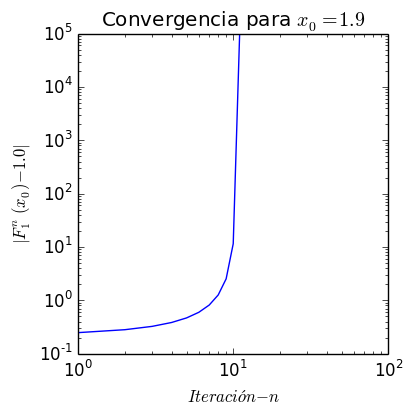

In [25]:
figure(figsize = (4, 4))
gpf3 = distancia(f3, 1.2, pf3, 1000000);
d3 = reshape(gpf3, 1000000)
loglog(d3)
title(L"Convergencia para $x_0 = 1.9$")
xlabel(L"Iteración-n")
ylabel(L"|F_1^n(x_0) - 1.0|")
show()

Análogamente a la primer función, observamos que se trata de un punto fijo repulsor. Calculemos la derivada:

In [26]:
deri3 = xdual(1.0)
f3(deri3)

AD.Dual{Float64}(1.0,1.0)

Coincide también con el valor 1.0

## Para $f_{4}^2$

En este caso, debemos implementar otro método para calcular los puntos fijos, pues estamos interesados en los ciclos
de periodo 2.

In [27]:
function puntofijo(F::Function, range)
    pf= fzeros(x -> (F(x) - x) , range)
    return pf
end

puntofijo (generic function with 1 method)

In [28]:
pf41=puntofijo(f42,[-2.0,2.0])

4-element Array{Real,1}:
 -1.20711 
 -0.724745
  0.207107
  1.72474 

Escojemos los que tienen ciclo de periodo 2:

In [29]:
pf42 = [pf41[1], pf41[3]]

2-element Array{Float64,1}:
 -1.20711 
  0.207107

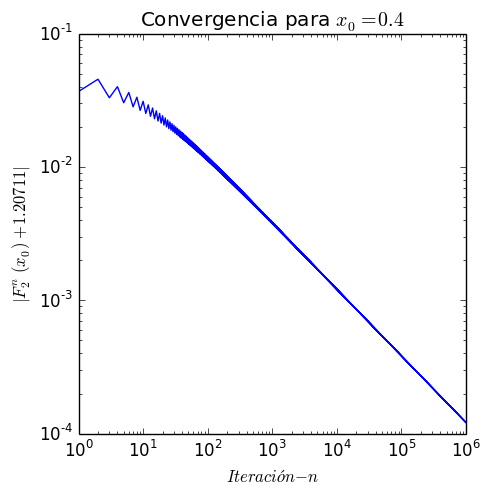

In [30]:
figure(figsize = (5, 5))
gpf4 = distancia(f42,-1.25, pf42, 1000000)
d4 = reshape(gpf4[:,1],1000000)
loglog(d4)
title(L"Convergencia para $x_0 =0.4$")
xlabel(L"Iteración-n")
ylabel(L"|F_2^n(x_0) + 1.20711|")
show()


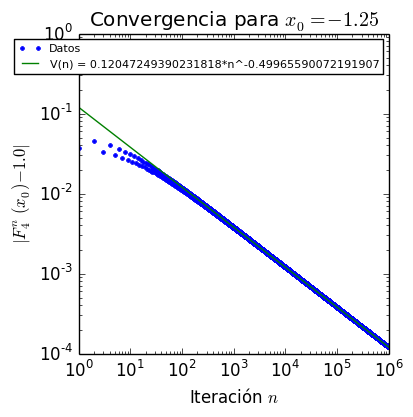

In [31]:
figure(figsize = (4,4))
dom1 = collect(1:1000000)
a1, b1 = linreg(log(dom1), log(d4))
ran1 = Float64[exp(a1)*x^b1 for x in dom1]
loglog(d4, ".", label = "Datos")
loglog(dom1, ran1, label = "V(n) = $(exp(a1))*n^$b1")
legend(fontsize = 8, loc = "auto")
title(L"Convergencia para $x_0 = -1.25$")
xlabel(L"Iteración $n$")
ylabel(L"|F_4^n(x_0) - 1.0|")
show()

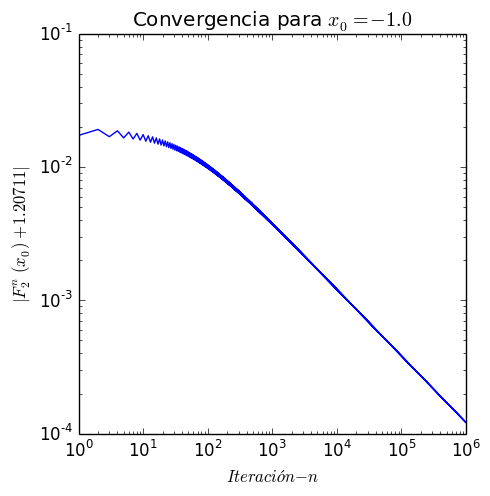

In [32]:
figure(figsize = (5, 5))
gpf4 = distancia(f42,-1.0, pf42, 1000000)
d4 = reshape(gpf4[:,1],1000000)
loglog(d4)
title(L"Convergencia para $x_0 =-1.0$")
xlabel(L"Iteración-n")
ylabel(L"|F_2^n(x_0) +1.20711|")
show()


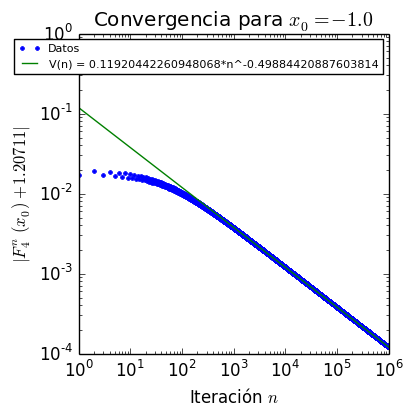

In [33]:
figure(figsize = (4,4))
dom1 = collect(1:1000000)
a1, b1 = linreg(log(dom1), log(d4))
ran1 = Float64[exp(a1)*x^b1 for x in dom1]
loglog(d4, ".", label = "Datos")
loglog(dom1, ran1, label = "V(n) = $(exp(a1))*n^$b1")
legend(fontsize = 8, loc = "auto")
title(L"Convergencia para $x_0 = -1.0$")
xlabel(L"Iteración $n$")
ylabel(L"|F_4^n(x_0) + 1.20711|")
show()

La velocidad de convergencia para ambos casos es del mismo orden: $V(n) \approx \frac{0.119}{\sqrt{n}}$, por lo que concluimos que $-1.20711$ es un punto fijo atractor.

Hagamos el análisis para el punto fijo $0.2071$. 

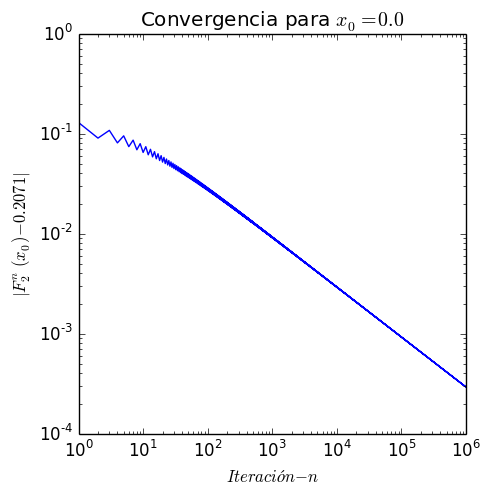

In [34]:
figure(figsize = (5, 5))
gpf4 = distancia(f42,0.0, pf42, 1000000)
d4 = reshape(gpf4[:,2],1000000)
loglog(d4)
title(L"Convergencia para $x_0 =0.0$")
xlabel(L"Iteración-n")
ylabel(L"|F_2^n(x_0) -0.2071|")
show()

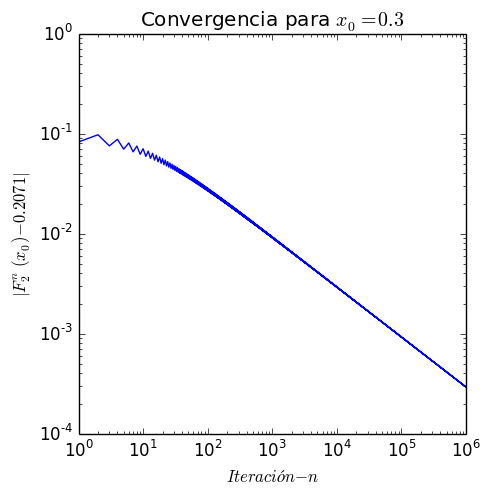

In [35]:
figure(figsize = (5, 5))
gpf4 = distancia(f42,0.3, pf42, 1000000)
d4 = reshape(gpf4[:,2],1000000)
loglog(d4)
title(L"Convergencia para $x_0 =0.3$")
xlabel(L"Iteración-n")
ylabel(L"|F_2^n(x_0) -0.2071|")
show()

Para ambos casos observamos comportamiento atractivo, encontremos la velocidad de convergencia:

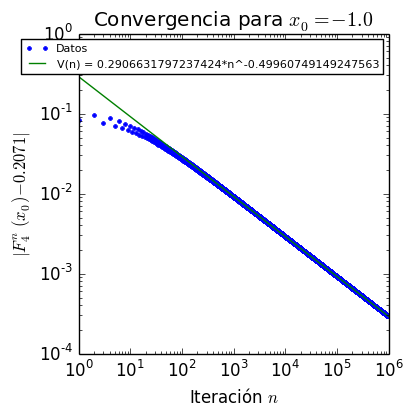

In [36]:
figure(figsize = (4,4))
dom1 = collect(1:1000000)
a1, b1 = linreg(log(dom1), log(d4))
ran1 = Float64[exp(a1)*x^b1 for x in dom1]
loglog(d4, ".", label = "Datos")
loglog(dom1, ran1, label = "V(n) = $(exp(a1))*n^$b1")
legend(fontsize = 8, loc = "auto")
title(L"Convergencia para $x_0 = -1.0$")
xlabel(L"Iteración $n$")
ylabel(L"|F_4^n(x_0) -0.2071|")
show()

La velocidad de convergencia está dada por $V(N) \approx \frac{0.297}{\sqrt{n}}$. Finalmente calculemos la derivada:

In [37]:
deripf42 = Float64[]

for j in pf42
    x0 = xdual(j)
    push!(deripf42, f42(x0).der)
end
pf42, deripf42

([-1.2071067811865475,0.20710678118654752],[-0.9999999999999997,-0.9999999999999999])

En ambos casos la derivada es menor que uno. Por lo que inferimos que para puntos fijos atractores esto siempre sucede.

## Para $f_5^2$

In [38]:
pf52=puntofijo(f52,[-1.0,1.0])

1-element Array{Float64,1}:
 1.0

In [39]:
deri5 = xdual(1.0)
f52(deri5)

AD.Dual{Float64}(1.0,1.0)

La derivada es 1 , por lo que de nuevo no podemos concluir si es atractor o repulsor. Hagamos entonces el análisis.

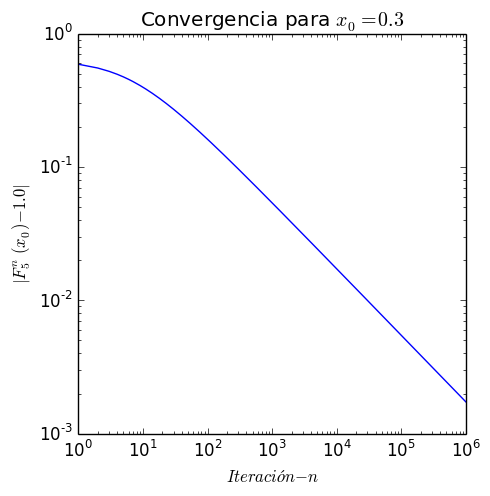

PyObject <matplotlib.text.Text object at 0x319927290>

In [40]:
figure(figsize = (5, 5))
gpf5 = distancia(f52,0.3, pf52, 1000000)
d5 = reshape(gpf5,1000000)
loglog(d5)
title(L"Convergencia para $x_0 =0.3$")
xlabel(L"Iteración-n")
ylabel(L"|F_5^n(x_0) -1.0|")
#show()

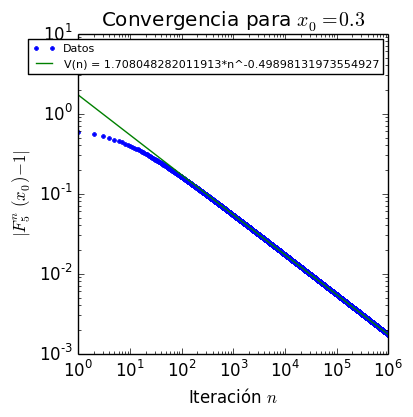

In [41]:
figure(figsize = (4,4))
dom1 = collect(1:1000000)
a1, b1 = linreg(log(dom1), log(d5))
ran1 = Float64[exp(a1)*x^b1 for x in dom1]
loglog(d5, ".", label = "Datos")
loglog(dom1, ran1, label = "V(n) = $(exp(a1))*n^$b1")
legend(fontsize = 8, loc = "auto")
title(L"Convergencia para $x_0 = 0.3$")
xlabel(L"Iteración $n$")
ylabel(L"|F_5^n(x_0) -1|")
show()

La velocidad de convergencia es $V(n) \approx \frac{1.708}{\sqrt{n}}$. Es un punto fijo repulsor. 


## Ejercicio 1.
Llamemos $c_n$ el valor del parámetro $c$ donde ocurre la bifurcación de doblamiento de periodo para el mapeo $Q_c(x)$, donde la órbita de periodo $2^n$ nace. Es decir, tenemos que $c_0=1/4$ marca la aparición del atractor de periodo $2^0=1$, $c_1=-1/4$ corresponde a la aparición del atractor de periodo $2^1=2$, $c_2=-3/4$ a la aparición del atractor de periodo $2^2=4$, etc.
A partir de estos valores y otros que calcularán (al menos deben encontrar $c_6$), definimos la secuencia: $\{f_0, f_1, f_2, \dots\}$, donde
$$
f_n = \frac{c_n-c_{n+1}}{c_{n+1}-c_{n+2}} .
$$
La pregunta es, ¿a qué valor converge esta secuencia?, es decir, dar una estimación de $f_\infty$.
Hint: Para realizar este ejercicio deben calcular el atractor para varias valores de $c$, de tal manera que puedan aislar las órbitas de periodo $2^p$ y de ahí determinar varios valores $c_n$. Sin embargo, van a requerir suficiente cuidado para obtener una buena aproximación de $c_n$.
Una opción, que tiene ciertos inconvenientes numéricos que también ciertas ventajas se basa en recordar/usar que las bifurcaciones de doblamiento de periodo ocurren cuando los puntos de la órbita de periodo $p$ se tornan en repulsores, es decir, $(Q_c^p)'(x)=-1$. Esta opción, entonces, involucra obtener los valores $c_n$ usando los polinomios $Q_c^p(x)$ y diferenciación automática.

Para hacer este ejercicio consideraremos que el valor de los coeficientes $C_{n}s^{'}$ puede ser obtenido a partir
del análisis de los exponentes de Lyapunov, los cuales ayudan a definir el caos en un sistema dinámico del siguiente
modo:

Considerando mapeos en una dimensión, la distancia entre los iterados $n$ es
$$
D_n = \big|\, f^{n}(x_0+\epsilon)-f^{n}(x_0) \big|\,.
$$
Entonces, suponiendo que $D_n$ tiene una dependencia exponencial de $n$, para $n\to\infty$ y $\epsilon\to 0$, escribimos $D_n= \epsilon \exp(\lambda n)$, de donde obtenemos
$$
\lambda(x_0) \equiv \lim_{n\to\infty} \lim_{\epsilon\to 0} 
\frac{1}{n}\log\Big| \frac{f^{n}(x_0+\epsilon)-f^{n}(x_0)}{\epsilon}\Big|.
$$
A $\lambda(x_0)$ se le llama exponente de Lyapunov. Si $\lambda(x_0)>0$ diremos que hay caos, mientras que si $\lambda(x_0)<0$ diremos que no lo hay.


Si el mapeo $f(x)$ es suficientemente suave, entonces podemos escribir
$$
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n}\log\Big| \frac{{\rm d} f^{n}}{{\rm d}x}(x_0)\Big|,
$$
Usando que
$$
\frac{{\rm d}f^n}{{\rm d}x}(x_0) = f'(x_0) f'(x_1)\dots f'(x_{n-1}) 
= \prod_{i=1}^{n} f'(x_i), 
$$
donde $x_i=f^i(x_0)$ obtenemos
$$
\lambda(x_0) = \lim_{n\to\infty} \frac{1}{n} \sum_{i=1}^n \log
\Big| \, f'(x_i)\, \Big|.
$$


Y los valores de $C$ para los que $\lambda(x_{0})$ , para una condición inicial dada,alcanza un mínimo local, son los que nos interesa obtener para calcular la secuencia $f_{n}$. 

Así mismo, como se vio en clase, se sabe que los exponentes de Lyapunov se anulan cuando el valor de $C$ caracteriza la bifurcación del sistema. Sin embargo, en este ejercicio consideraremos los mínimos para obtener valores más precisos de la $C$. 

Iterémos n veces una función f cualquiera dada una condición inicial $x_{0}$.

In [42]:
function iterandoando(f::Function,x0::Float64,n::Int64)
    ev = Float64[x0]
    x=x0
    for i in 1:n
        x=f(x)
        push!(ev,x)
    end
    ev
end

iterandoando (generic function with 1 method)

Calculemos entonces los exponentes de Lyapunov de la función f:

In [43]:
function exponentes(ev::Array,f::Function)
    n=length(ev)
    lambda=0
    for i in 1:n
        sumando=abs((f(xdual(ev[i]))).der)
        lambda=lambda + log(sumando)
       # println("Valor del exponente en la iteración")(i,lambda/i)
    end
    lambda/n
end


exponentes (generic function with 1 method)

Ahora utilicemos las funciones antes creadas para obtener los exponentes  de nuestras $Q_{c}(x)$. Como queremos encontrar los mínimos de la función, sólo nos interesarán los exponentes de Lyapunov negativos.

In [44]:
function explyap(Qc::Function,x0::Float64,crange::FloatRange,n::Int64)
    evaluacion=Float64[]
    valordec=Float64[]
    for i in crange
        Qci(x)=Qc(x,i)
        ev=iterandoando(Qci,x0,n)
        lambda=exponentes(ev,Qci)
        if lambda<=0
            if abs(lambda)<Inf
                push!(evaluacion,lambda)
            else
                push!(evaluacion,-10)       
          end
        else
            break 
        end 
    end 
    for i in 1:length(evaluacion)
        push!(valordec,crange[i])
    end
    evaluacion,valordec
end

explyap (generic function with 1 method)

In [45]:
Qc(x,c)=x^2+c

Qc (generic function with 1 method)

In [46]:
crange = -(0.75-1/2^16):-1/2^16:-1.405
func,c= explyap(Qc,1.0,crange,10000);

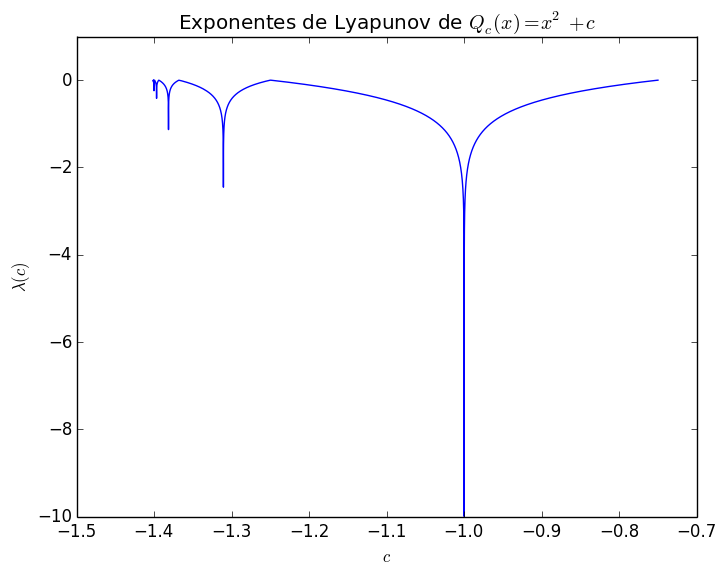

In [47]:
p = plot(c, func)
xlabel(L"c")
ylabel(L"\lambda(c)")
title(L"Exponentes de Lyapunov de $Q_c(x)= x^2 +c$")
ylim(-10,1.0)
show()

Ahora calculemos los mínimos que se observan en la gráfica anterior mediante un código conocido de cursos anteriores:

In [48]:
function minimize(func::Array,crange::Array)
    n = length(func)
    c = Float64[]
    for i in 2:n-1       
        if (abs(func[i+1]) > abs(func[i]) < abs(func[i-1])) 
            push!(c,(crange[i]))
        end
        
    end
    return c
end

minimize (generic function with 1 method)

In [49]:
dp = (minimize(func,c))
dp = deleteat!(dp,4)

7-element Array{Float64,1}:
 -1.24995
 -1.36807
 -1.39404
 -1.39963
 -1.40083
 -1.40108
 -1.40114

Finalmente, calculemos el límite de la sucesión $f_n$.

In [50]:
function suc(dp::Array)
    lim = Float64[]
    for i in 3:length(dp)
        coc=((dp[i-2])-(dp[i-1]))/((dp[i-1])-(dp[i]))
        push!(lim,coc)
        end
    lim
end


suc (generic function with 1 method)

In [51]:
suc(dp)


5-element Array{Float64,1}:
 4.54818
 4.65027
 4.63291
 4.9375 
 4.0    

Calculando el promedio de estos valores, obtenemos el límite buscado:

$f_{n} \approx 4.553772$

### Ejercicio 2:
Repitan el ejercicio anterior para el mapeo $S_c(x) = c \sin(x)$. ¿Cómo se comparan los valores obtenidos de $f_n$?

In [52]:
Qc(x)=c*sin(x)

Qc (generic function with 2 methods)

In [53]:
crange = -(0.75-1/2^16):-1/2^16:-1.405
func,c= explyap(Qc,1.0,crange,10000);

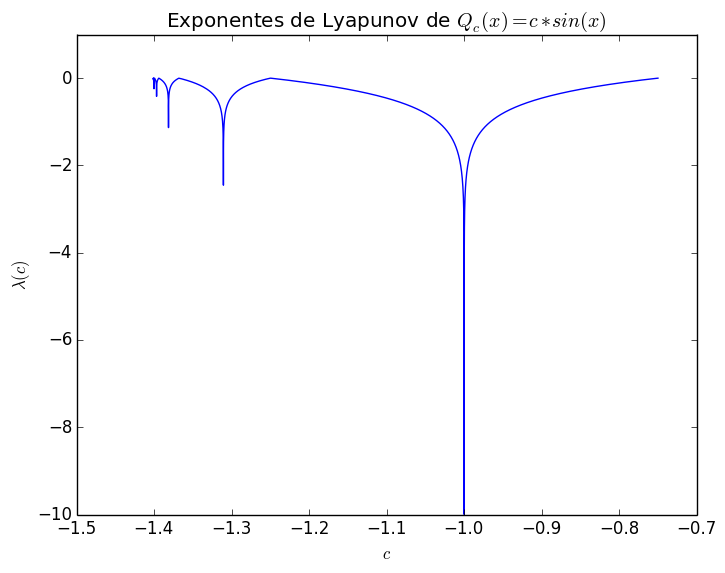

In [73]:
p = plot(c, func)
xlabel(L"c")
ylabel(L"\lambda(c)")
title(L"Exponentes de Lyapunov de $Q_c(x)=c*sin(x)$")
ylim(-10,1.0)
show()

In [55]:
function minimize(func::Array,crange::Array)
    n = length(func)
    c = Float64[]
    for i in 2:n-1       
        if (abs(func[i+1]) > abs(func[i]) < abs(func[i-1])) 
            push!(c,(crange[i]))
        end
        
    end
    return c
end

minimize (generic function with 1 method)

In [56]:
dp = (minimize(func,c))
dp = deleteat!(dp,5)

7-element Array{Float64,1}:
 -1.24995
 -1.36807
 -1.39404
 -1.39925
 -1.40083
 -1.40108
 -1.40114

In [57]:
function suc(dp::Array)
    lim = Float64[]
    for i in 3:length(dp)
        coc=((dp[i-2])-(dp[i-1]))/((dp[i-1])-(dp[i]))
        push!(lim,coc)
        end
    lim
end


suc (generic function with 1 method)

In [58]:
suc(dp)


5-element Array{Float64,1}:
 4.54818
 4.9912 
 3.27885
 6.5    
 4.0    

Obteniendo el promedio de estos valores, tenemos que en este caso $f_n \approx 4.663646$. Lo cual indica que debe existir algún error de corte numérico en nuestros códigos, ya que según vimos en clase, éste valor es constante.

**Ejercicio 3:**

Como se ve en la Fig. 1 (de [este](https://github.com/lbenet/2017-1_TSFisComp/blob/master/notas_clase/08_Mapeos1d-3.ipynb) notebook), $x=0$ pertenece a un ciclo de periodo $2^n$ para ciertos valores $C_n$ del parámetro. Dichos valores son *especiales*, ya que $x=0$ esté en el ciclo de periodo $2^n$ marca los llamados *ciclos superestable*, donde tenemos $(Q^{2^p}_{C_n})'(0)=0$.

¿A qué converge la secuencia $f_n$, definida ahora con los valores $C_n$.

De los $2^p$ puntos del ciclo de periodo $2^p$, es decir, $\{0, p_1, \dots p_{2^{n-1}}\,\}$ hay uno (distinto del 0) cuya distancia a 0 es menor; a ese punto lo identificamos como $d_n$. Calcular numéricamente a dónde converge la secuencia $d_n/d_{n+1}$.

In [59]:
#Se construye la funición 'Qc_n' que permite calcular la n-ésima iteración del mapeo cuadrático 'Qc' para un valor de 'c'
#determinado.
function Qc_n(x,cond)
    c,n = cond[1],cond[2]
    for i in 1:n
        x=Qc(x,c)
    end
    return x
end

Qc_n (generic function with 1 method)

In [60]:
#Se construye la función 'raices_newton' que permite calcular las raices de la función 'f', mediante el método de 
#Newton, dada una condición inicial 'x0'. Se utiliza 'AutomDiff_V2.jl' para obtener la derivada de la función evaluada
#en el punto 'x'.
function compute_roots(f,x0)
    x = x0
    for i in 1:100
        x = x - f(x) / f(xdual(x)).der
    end
    x
end

compute_roots (generic function with 1 method)

A continuación se calculan las primeras $6$ $C_{n}$ correspondientes al mapeo 'Qc' iterado $2^n$ veces respectivamente, para x=0. La condición inicial para cada caso se obtuvo de la observación de la figura 1 del notebook.  

In [61]:
Q0(c)= Qc_n(0,(c,1))
C0=compute_roots(Q0,0.4)

0.0

In [62]:
Q1(c)= Qc_n(0,(c,2))
C1=compute_roots(Q1,-1)

-1.0

In [63]:
Q2(c)= Qc_n(0,(c,4))
C2=compute_roots(Q2,-1.4)

-1.3107026413368328

In [64]:
Q3(c)= Qc_n(0,(c,8))
C3=compute_roots(Q3,-1.38)

-1.3815474844320617

In [65]:
Q4(c)= Qc_n(0,(c,16))
C4=compute_roots(Q4,-1.4)

-1.3969453597045602

In [66]:
Q5(c)= Qc_n(0,(c,32))
C5=compute_roots(Q5,-1.4)

-1.4002530812147829

Enotnes, las **$C_{n}$'s** son:

In [67]:
cs=[C0,C1,C2,C3,C4,C5]

6-element Array{Float64,1}:
  0.0    
 -1.0    
 -1.3107 
 -1.38155
 -1.39695
 -1.40025

Se calculan las $f_n$:

In [68]:
suc(cs) #se utiliza la función del ejercicio 1.

4-element Array{Float64,1}:
 3.21851
 4.38568
 4.60095
 4.65513

Se observa que $f_n$ tiende a la constante de Feigenbaum $4.6692$

Se calculan las $d_n$. En este caso, como se quiere calcular el mínimo de las distancias entre el $0$ y cada iterado, se toma sólamente el mínimo de los iterados.

In [69]:
#Se construye la función 'd_n' que permite calcular el mínimo elemento del arreglo que contiene a las (2^n)-1 iteraciones 
#correspondientes a la función 'Qc', tomando como el argumento 'c' a cada una de las "c's" calculadas en la primera 
#parte de este ejercicio.
function d_n(a::Array)
    d=Float64[]
    for i in 2:length(a)
        y=minabs(deleteat!(iterandoando(x->Qc(x,a[i]),0.0,(2^(i-1))-1),1))
        push!(d,y)
    end
    d
end

d_n (generic function with 1 method)

Entonces las "$d_{n}$'s" son:

In [70]:
d_n(cs)

5-element Array{Float64,1}:
 1.0      
 0.407239 
 0.163425 
 0.0653634
 0.0261213

In [71]:
#Esta función permite calcular la sucesión 'd_n/d_n+1'
function suc2(a::Array)
    coc=Float64[]
    for i in 1:length(a)-1
        d=a[i]/a[i+1]
        push!(coc,d)
    end
    coc
end

suc2 (generic function with 1 method)

In [74]:
suc2(d_n(cs))

4-element Array{Float64,1}:
 2.45556
 2.49189
 2.50026
 2.50231

Se observa que la sucesión converge a $2.5029$, el cual es la segunda constante de Feigenbaum.